# Maria Micaela Ninni - GEOL542
## September 16th, 2021
## Module 6 - Analzing Data from Multiple Files

In [131]:
import glob #find data in a location with some text - see this for PILs
import numpy as np
import matplotlib.pyplot as plt
import random

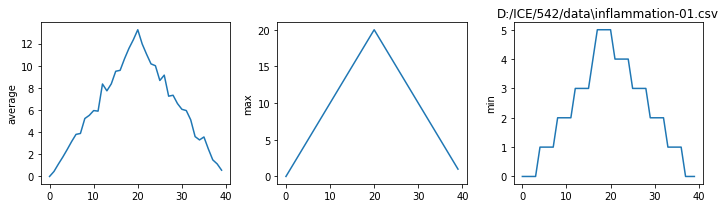

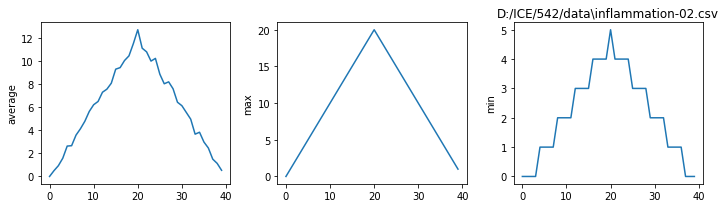

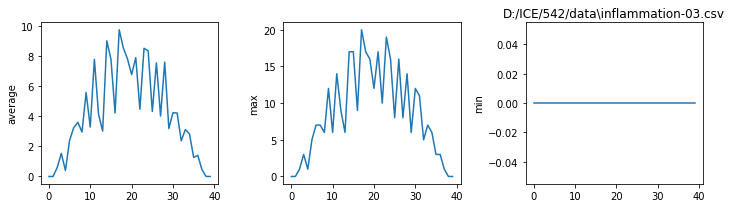

In [132]:
inf_data = sorted(glob.glob('D:/ICE/542/data/inflammation*.csv')) # sorted organizes the files alphabetical order
first_inf = 0
last_inf = 3
inf_data = inf_data[first_inf:last_inf]

for filename in inf_data:
    
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    plt.title(f'{filename}')

    ax1.set_ylabel('average')
    ax1.plot(np.mean(data, axis=0))

    ax2.set_ylabel('max')
    ax2.plot(np.max(data, axis=0))

    ax3.set_ylabel('min')
    ax3.plot(np.min(data, axis=0))

    
    fig.tight_layout()
    plt.show()

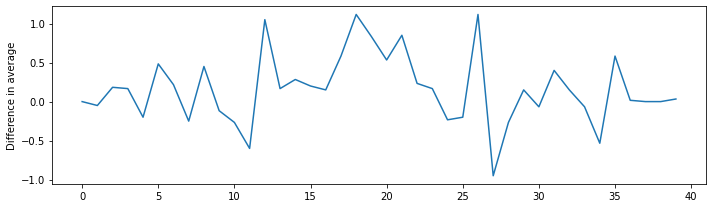

In [133]:
data0 = np.loadtxt(fname=inf_data[0], delimiter=',')
data1 = np.loadtxt(fname=inf_data[1], delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

plt.ylabel('Difference in average')
plt.plot(np.mean(data0, axis=0) - np.mean(data1, axis=0))

fig.tight_layout()
plt.show()

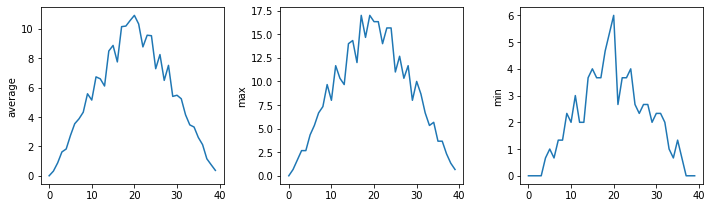

In [134]:
composite_data = np.zeros((60,40))

for filename in inf_data:
    data = np.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data

composite_data = composite_data / len(inf_data)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(composite_data, axis=0))

fig.tight_layout()

plt.show()

## Module 7 - Making Choices

In [135]:
u = 200
num = random.randint(1,u)

if num > 100:
    print(f'{num} is greater 100')
else:
    print(f'{num} is not greater than 100')

pnz = random.randint(0,2)
if pnz == 1:
    print('and', num, 'is positive')
elif num == 0:
    print('but', num, 'is zero')
else:
    num = -num
    print(f'but {num} is negative')

145 is greater 100
but -145 is negative


## Exercises with a twist

In [136]:
#1
p1 = random.randint(1,10)
p2 = random.randint(1,10)

if p1 > p2:
    print('A')
elif p1 == p2:
    print('B')
elif p1 < p2:
    print('C')

#2
value = ['', 'word', [], (1,2,3), 0, 1]
element = value[random.randint(0,len(value)-1)]

if element == '':
    print('empty string is true')
if element == 'word':
   print('word is true')
if element == []:
   print('empty list is true')
if element == [1, 2, 3]:
   print('non-empty list is true')
if element == 0:
   print('zero is true')
if element == 1:
    print('one is true')

#3
a = random.randint(1,200)
b = random.randint(1,100)

if abs(a - b) <= 0.1 * abs(b):
    print('Absolute True')
else:
    print('Absolute False')

#4
positive_sum = 0
negative_sum = 0
test_list = [3, 4, 6, 1, -1, -5, 0, 7, -8]
for n in test_list:
    if n > 0:
        positive_sum += n
    elif n == 0:
        pass
    else:
        negative_sum += n
print('positive number sum', positive_sum, 'negative number sum', negative_sum)

#5
vowels = 'aeiouAEIOU'
sentence = 'He that falls in love with himself will have no rivals. Benjamin Franklin'
count = 0
for char in sentence:
    if char in vowels:
        count += 1

print('The number of vowels in this string is ' + str(count))


C
Absolute False
positive number sum 21 negative number sum -14
The number of vowels in this string is 20


## Module 8

In [137]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))


def celsius_to_kelvin(temp_c):
    return print('Kelvin =', temp_c + 273.15)

temp = fahr_to_celsius(num) #is using rnd number between -200 and 200 see up

if temp > 0 and temp < 100:
    print (f'the temp {temp}C is in between freezing and boiling')
elif temp > 200:
    print (f'At {temp}C the water is boiling')
elif temp == 0:
    print('Triple Point! Celcius rocks!')
else:
    print (f'At {temp}C the water is freezing')


celsius_to_kelvin(temp)

At -98.33333333333334C the water is freezing
Kelvin = 174.81666666666663


In [138]:
def offset_mean(data, target_mean_value):
    return (data - np.mean(data)) + target_mean_value

data = np.loadtxt(fname='D:/ICE/542/data/inflammation-01.csv', delimiter=',')
offset_data = offset_mean(data, 0)

def inf_parameters(data):
    min = np.min(data)
    mean = np.mean(data)
    max = np.mean(data)
    std = np.std(data)

    return min, mean, max, std

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

data_param = offset_data, data
count = 0
for i in data_param:
    name = namestr(i, globals())
    param_param = ['min', 'mean', 'max', 'std']
    param = inf_parameters(i)
    for u in range(0,len(param)):
        print('for', name[0], 'the', param_param[u], 'is', param[u])
    
    

for offset_data the min is -6.14875
for offset_data the mean is 2.842170943040401e-16
for offset_data the max is 2.842170943040401e-16
for offset_data the std is 4.613833197118566
for data the min is 0.0
for data the mean is 6.14875
for data the max is 6.14875
for data the std is 4.613833197118566


In [139]:
def fence(original, wrapper):
    print (wrapper + original + wrapper)

def add(a, b):
    print(a + b)

def outer(input_string):
    print (input_string[0] + input_string[-1])

def f2k(f):
    k = ((f - 32) * (5.0 / 9.0)) + 273.15
    return k

def func(a, b=3, c=6):
    print('a: ', a, 'b: ', b, 'c:', c)

add(p1,p2)
fence('name', '*')
outer('helium')

def rescale(input_array):
    L = np.min(input_array)
    H = np.max(input_array)
    output_array = (input_array - L) / (H - L)
    return output_array


f,k = 0, 0
print(f2k(8))
print(f2k(41))
print(f2k(32))
print(k)

func(p1, p2)


11
*name*
hm
259.81666666666666
278.15
273.15
0
a:  1 b:  10 c: 6
